In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

total_df = pd.read_csv('fine_dust_data.csv', encoding='cp949')
weather_2016 = pd.read_csv('기상관측2016real_Fixed.csv', encoding='cp949')

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    rc('font', family='AppleGothic')

In [90]:
total_df
dust_2016=total_df[:6222]


In [91]:
dust_2016

,시도코드,일시,시도,PM10,PM25,PM10등급,PM25등급
0,42,20160101,강원,55.840336,48.736434,2,2
1,42,20160102,강원,49.324324,41.633803,2,2
2,42,20160103,강원,68.203390,56.683099,2,3
3,42,20160104,강원,73.858333,58.326389,2,3
4,42,20160105,강원,26.977974,17.550388,1,2
...,...,...,...,...,...,...,...
6217,43,20161227,충북,37.452297,28.068182,2,2
6218,43,20161228,충북,45.156584,29.427451,2,2
6219,43,20161229,충북,37.128920,21.958175,2,2
6220,43,20161230,충북,37.454545,25.600760,2,2


In [11]:
#total_df = total_df.sort_values(by=['시도코드', '일시'])
#total_df.reset_index(level= None, inplace = True)
del total_df['level_0']

In [93]:
dust_2016.groupby('시도코드').count()

,일시,시도,PM10,PM25,PM10등급,PM25등급
시도코드,,,,,,
11,366,366,366,366,366,366
26,366,366,366,366,366,366
27,366,366,366,366,366,366
28,366,366,366,366,366,366
29,366,366,366,366,366,366
30,366,366,366,366,366,366
31,366,366,366,366,366,366
36,366,366,366,366,366,366
41,366,366,366,366,366,366


In [96]:
weather_2016

,Unnamed: 0,기상번호,시도코드,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),최다풍향(16방위),평균 현지기압(hPa),일 최심신적설(cm),일강수량(mm),강수 계속시간(hr)
0,0,1120160101,11,20160101,1.200,-3.300,4.000,1.600,90.0,1019.900,0.0,0.000,0.0000
1,1,1120160102,11,20160102,5.700,1.000,9.500,2.000,320.0,1012.000,0.0,0.000,0.0000
2,2,1120160103,11,20160103,6.500,5.100,9.400,1.800,320.0,1008.900,0.0,0.000,0.0000
3,3,1120160104,11,20160104,2.000,-2.500,5.300,3.100,320.0,1013.100,0.0,0.000,0.0000
4,4,1120160105,11,20160105,-2.700,-4.800,1.500,2.300,20.0,1016.900,0.0,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,6217,4920161227,49,20161227,5.800,3.100,9.575,8.050,310.0,1018.100,0.0,0.350,1.4675
6218,6218,4920161228,49,20161228,5.225,2.800,7.975,3.975,235.0,1023.025,0.0,0.000,0.0000
6219,6219,4920161229,49,20161229,5.400,3.675,8.000,5.950,287.5,1024.475,0.0,0.075,1.0500
6220,6220,4920161230,49,20161230,5.050,2.550,8.150,3.225,172.5,1026.350,0.0,0.000,0.0000


In [95]:
climate_2016=pd.merge(weather_2016,dust_2016)
###climate_2016.reset_index(level= None, inplace = True)
del climate_2016['Unnamed: 0']
climate_2016

,기상번호,시도코드,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),최다풍향(16방위),평균 현지기압(hPa),일 최심신적설(cm),일강수량(mm),강수 계속시간(hr),시도,PM10,PM25,PM10등급,PM25등급
0,1120160101,11,20160101,1.200,-3.300,4.000,1.600,90.0,1019.900,0.0,0.000,0.0000,서울,69.979753,43.506066,2,2
1,1120160102,11,20160102,5.700,1.000,9.500,2.000,320.0,1012.000,0.0,0.000,0.0000,서울,53.582955,30.946644,2,2
2,1120160103,11,20160103,6.500,5.100,9.400,1.800,320.0,1008.900,0.0,0.000,0.0000,서울,98.532391,57.752122,3,3
3,1120160104,11,20160104,2.000,-2.500,5.300,3.100,320.0,1013.100,0.0,0.000,0.0000,서울,78.656682,46.871134,2,2
4,1120160105,11,20160105,-2.700,-4.800,1.500,2.300,20.0,1016.900,0.0,0.000,0.0000,서울,33.758734,16.394604,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,4920161227,49,20161227,5.800,3.100,9.575,8.050,310.0,1018.100,0.0,0.350,1.4675,제주,26.985915,13.402985,1,1
6218,4920161228,49,20161228,5.225,2.800,7.975,3.975,235.0,1023.025,0.0,0.000,0.0000,제주,20.214286,9.071429,1,1
6219,4920161229,49,20161229,5.400,3.675,8.000,5.950,287.5,1024.475,0.0,0.075,1.0500,제주,28.388060,14.464789,1,1
6220,4920161230,49,20161230,5.050,2.550,8.150,3.225,172.5,1026.350,0.0,0.000,0.0000,제주,22.942029,9.830986,1,1


In [161]:
def month(x):
    return re.compile('(\d{4})(\d{2})(\d{2})').sub('\g<1>-\g<2>', str(x))

climate_2016['YYYY-MM']=climate_2016['일시'].apply(month)
climate_2016['일시']=climate_2016['일시'].astype('str')
climate_2016


,기상번호,시도코드,일시,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),최다풍향(16방위),평균 현지기압(hPa),일 최심신적설(cm),일강수량(mm),강수 계속시간(hr),시도,PM10,PM25,PM10등급,PM25등급,YYYY-MM
0,1120160101,11,20160101,1.200,-3.300,4.000,1.600,90.0,1019.900,0.0,0.000,0.0000,서울,69.979753,43.506066,2,2,2016-01
1,1120160102,11,20160102,5.700,1.000,9.500,2.000,320.0,1012.000,0.0,0.000,0.0000,서울,53.582955,30.946644,2,2,2016-01
2,1120160103,11,20160103,6.500,5.100,9.400,1.800,320.0,1008.900,0.0,0.000,0.0000,서울,98.532391,57.752122,3,3,2016-01
3,1120160104,11,20160104,2.000,-2.500,5.300,3.100,320.0,1013.100,0.0,0.000,0.0000,서울,78.656682,46.871134,2,2,2016-01
4,1120160105,11,20160105,-2.700,-4.800,1.500,2.300,20.0,1016.900,0.0,0.000,0.0000,서울,33.758734,16.394604,2,2,2016-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6217,4920161227,49,20161227,5.800,3.100,9.575,8.050,310.0,1018.100,0.0,0.350,1.4675,제주,26.985915,13.402985,1,1,2016-12
6218,4920161228,49,20161228,5.225,2.800,7.975,3.975,235.0,1023.025,0.0,0.000,0.0000,제주,20.214286,9.071429,1,1,2016-12
6219,4920161229,49,20161229,5.400,3.675,8.000,5.950,287.5,1024.475,0.0,0.075,1.0500,제주,28.388060,14.464789,1,1,2016-12
6220,4920161230,49,20161230,5.050,2.550,8.150,3.225,172.5,1026.350,0.0,0.000,0.0000,제주,22.942029,9.830986,1,1,2016-12


Text(0.5, 1.0, '2016 전국 월별 초미세먼지농도')

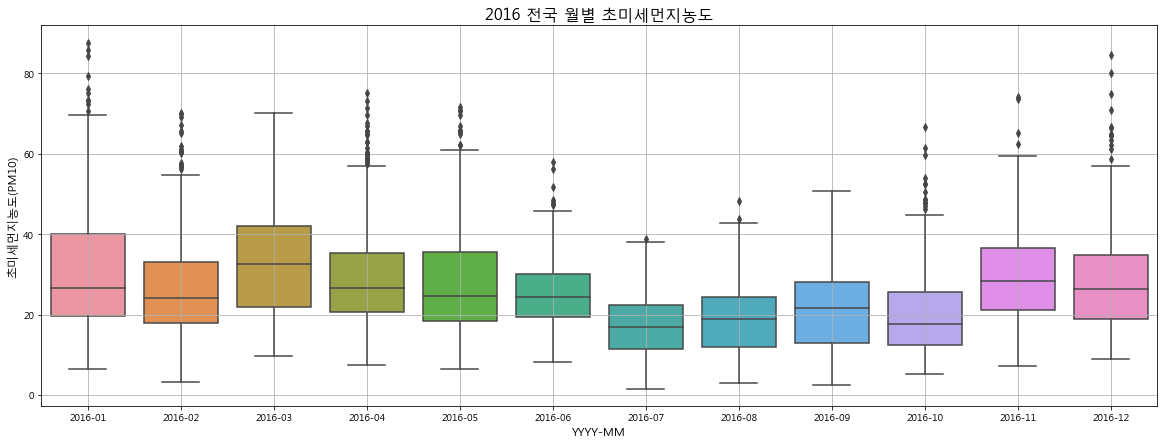

In [181]:
f, ax = plt.subplots(figsize = (20, 7))
sns.boxplot(x = 'YYYY-MM',
             y = 'PM25',
              data = climate_2016)

#sns.stripplot(x = 'YYYY-MM',y = 'PM10',data = climate_2016)

plt.grid(True)
plt.xlabel('YYYY-MM', fontsize=12 )
plt.ylabel('초미세먼지농도(PM10)', fontsize=12)
plt.title('2016 전국 월별 초미세먼지농도', fontsize=16)

In [165]:
a=climate_2016.groupby('일시').mean()
a = a.reset_index(level= None, inplace = True)
#a.to_csv('climate_2016.csv', encoding='cp949')
a

In [156]:
unique_2016=climate_2016.groupby(['일시']).mean()
#unique_2016.reset_index(level= None, inplace = True)
unique_2016   

,기상번호,시도코드,평균기온(°C),최저기온(°C),최고기온(°C),평균 풍속(m/s),최다풍향(16방위),평균 현지기압(hPa),일 최심신적설(cm),일강수량(mm),강수 계속시간(hr),PM10,PM25,PM10등급,PM25등급
일시,,,,,,,,,,,,,,,
20160101,3.684866e+09,36.647059,2.275775,-2.948240,7.636462,1.658486,224.856193,1020.380014,0.000000,0.000000,0.000000,59.082814,45.493350,2.000000,2.117647
20160102,3.684866e+09,36.647059,5.879205,1.275902,11.637857,1.625790,211.025093,1013.058924,0.000000,0.000000,0.004412,53.921167,38.258395,2.000000,2.000000
20160103,3.684866e+09,36.647059,6.612648,2.071931,13.012320,1.213297,228.372902,1009.382961,0.000000,0.000000,0.000000,69.611429,51.796949,2.176471,2.529412
20160104,3.684866e+09,36.647059,5.513301,0.812780,10.038114,2.259223,271.141790,1012.262465,0.000000,0.000000,0.000000,80.233362,58.846589,2.470588,2.705882
20160105,3.684866e+09,36.647059,1.047461,-1.672335,4.677325,2.067218,234.431970,1015.669310,0.000000,0.478139,0.254475,33.965176,19.395670,1.764706,1.882353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161227,3.684867e+09,36.647059,1.227275,-3.191728,4.632460,3.619635,277.961392,1011.210011,0.119328,1.117954,1.822609,33.073477,20.308363,1.647059,1.823529
20161228,3.684867e+09,36.647059,-0.947263,-5.884762,5.033598,1.780297,239.332383,1018.282391,0.019608,0.020448,0.072647,37.571337,20.846171,1.823529,1.823529
20161229,3.684867e+09,36.647059,-1.017437,-3.872636,2.442763,2.820081,276.466387,1018.635126,0.259419,0.174354,0.818408,34.691823,17.885565,1.823529,1.764706


FileNotFoundError: [Errno 2] No such file or directory: '2016 전국 미세/초미세 먼지 농도.png'

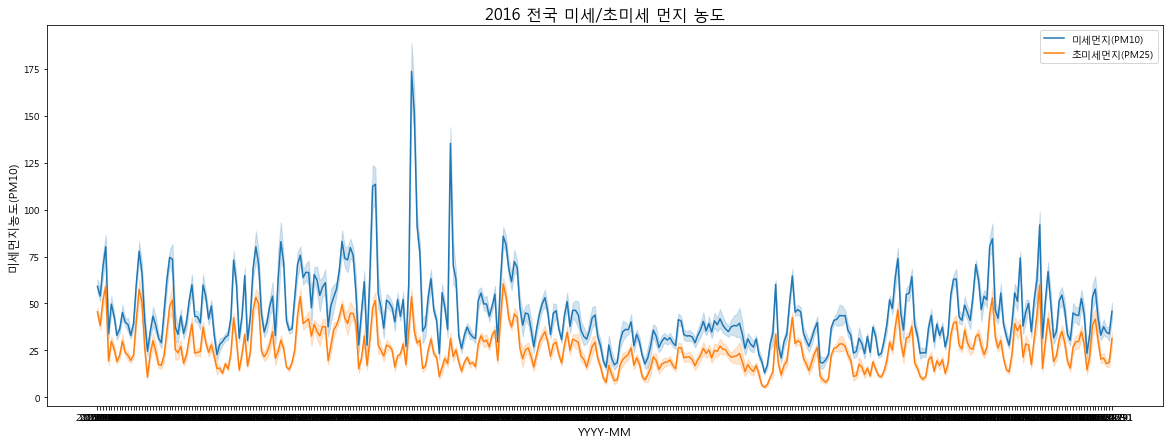

In [180]:
f, ax = plt.subplots(figsize = (20, 7))
sns.lineplot(x = '일시',
             y = 'PM10', 
             label = '미세먼지(PM10)',
             data = climate_2016)
sns.lineplot(x = '일시',
             y = 'PM25', 
             label = '초미세먼지(PM25)',
             data = climate_2016)

plt.xlabel('YYYY-MM', fontsize=12 )
plt.ylabel('미세먼지농도(PM10)', fontsize=12)
plt.title('2016 전국 미세/초미세 먼지 농도', fontsize=16)
plt.savefig('2016 전국 미세/초미세 먼지 농도')
#lineplot() 의 기본값은 신뢰 구간과 추정 회귀선을 함께 그리는 것입니다. 아래 그림은 subject 와 event 의 구분 없이 timepoint 별로 반복적으로 관측된 값을 바탕으로 그려진, 신뢰 구간과 추정 회귀선 입니다.

In [101]:
sido_code = {
     '42' : '강원',
     '41' : '경기',
     '43' : '충북',
     '44' : '충남',
     '30' : '대전',
     '47' : '경북',
     '48' : '경남',
     '45' : '전북',
     '46' : '전남', 
     '11' : '서울', 
     '28' : '인천',
     '27' : '대구',
     '31' : '울산',
     '29' : '광주', 
     '26' : '부산', 
     '49' : '제주',
     '36' : '세종'
}

Text(0.5, 1.0, '2016 전국 17개 지역별 미세먼지(PM10) 농도')

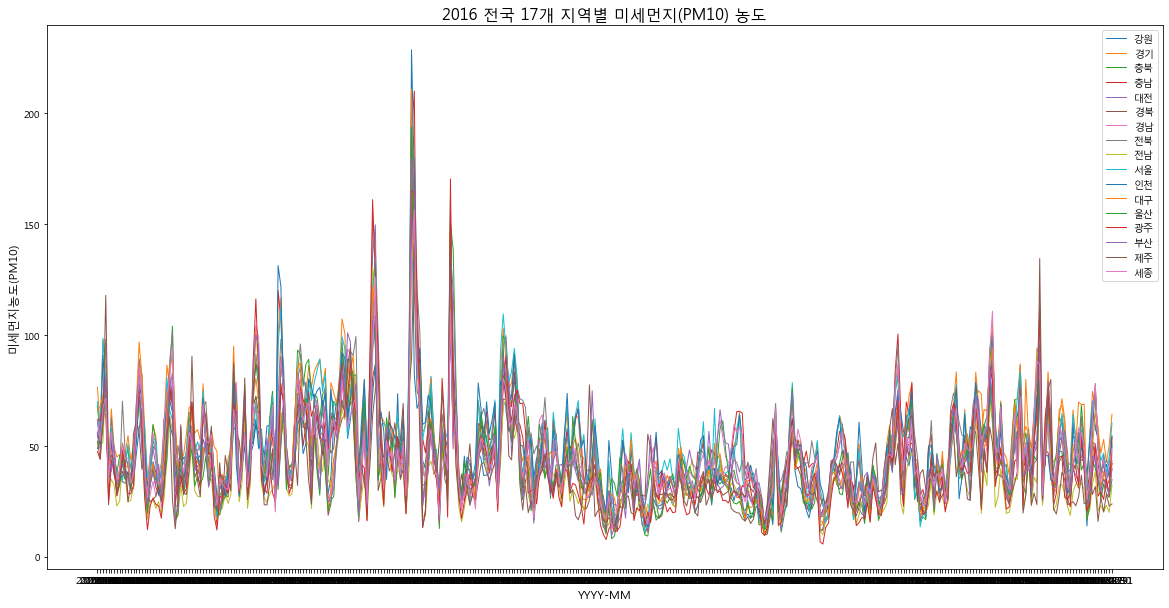

In [174]:

f, ax = plt.subplots(figsize = (20, 10))

for i in sido_code :

    sns.lineplot(x = '일시', y = 'PM10', label = sido_code.get(f"{i}"), data=climate_2016.query(f"시도코드 == '{i}'"), lw=1, estimator=None)
    
    pass
    
    #sns.lineplot(x = 'YYYY-MM', y = 'PM10', label = '서울', data=climate_2016.query("시도코드 == '30'"), lw=1)
plt.xlabel('YYYY-MM', fontsize=12 )
plt.ylabel('미세먼지농도(PM10)', fontsize=12)
plt.title('2016 전국 17개 지역별 미세먼지(PM10) 농도', fontsize=16)

In [24]:
 climate_2016['시도코드'

0       11
1       11
2       11
3       11
4       11
        ..
2191    30
2192    30
2193    30
2194    30
2195    30
Name: 시도코드, Length: 2196, dtype: int64

Text(0.5, 1.0, '2016 월별 미세먼지농도')

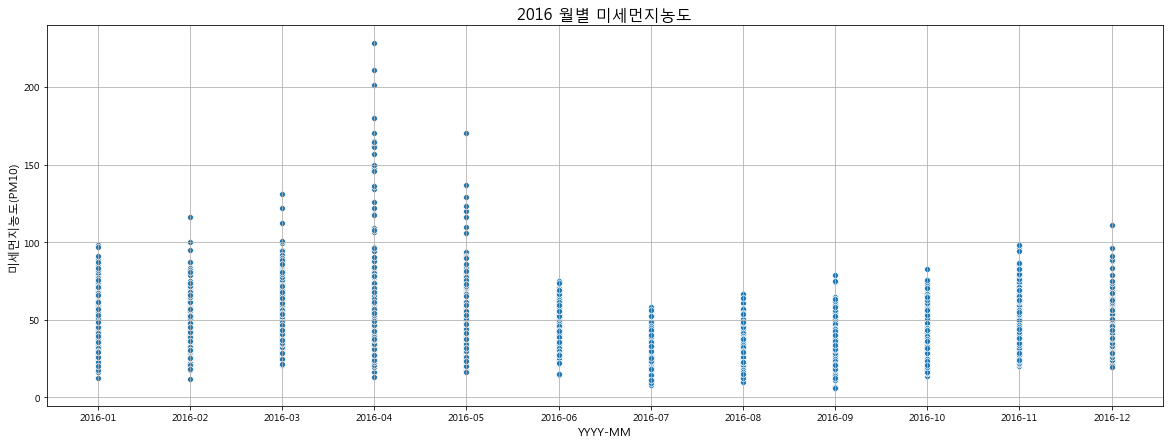

In [92]:
f, ax = plt.subplots(figsize = (20, 7))
sns.scatterplot(x = 'YYYY-MM',
             y = 'PM10',
              data = climate_2016)
plt.grid(True)
plt.xlabel('YYYY-MM', fontsize=12 )
plt.ylabel('미세먼지농도(PM10)', fontsize=12)
plt.title('2016 월별 미세먼지농도', fontsize=16)